In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd 
import sys 
sys.path.append("/Odyssey/private/t22picar/tools/")
from plot_tools import plot_uv_map,plot_map_zoom,plot_map_multizoom

In [2]:
# Select geostrophy and product 

time_target='2019-11-30'

box_cal = [-135, -115, 20, 50]
box_med = [-5.6, 16.8, 34.6, 44.6]
box_gs = [-80, 0, 30, 60 ]
box_agulhas = [0, 60, -50, -30]
box_NA = [-40, 0, 48, 68]

box_mozemb = [30, 54,-35, -6]
box_kuro = [135, 165, 25, 45]

In [3]:
# Year mean 
from glob import glob 

list_of_maps = sorted(glob("/Odyssey/private/t22picar/multivar_drifter/rec/unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_duacs_RonanUnet/daily/unet_rec_*.nc"))
imt = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')
ec_imt = imt.ugos**2 + imt.vgos**2

list_of_maps = sorted(glob("/Odyssey/private/t22picar/multivar_drifter/rec/globcurrent_15m_4th/daily/unet_rec_*.nc"))
gc = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')
gc = gc.interp(lon=ec_imt.lon,lat=ec_imt.lat,method="linear")
ec_gc = gc.ugos**2 + gc.vgos**2

list_of_maps = sorted(glob("/Odyssey/private/t22picar/multivar_drifter/rec/duacs_15m_8th/daily/duacs_15m_8th_*.nc"))
duacs = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')
duacs = duacs.rename({"longitude":"lon"})
duacs = duacs.rename({"latitude":"lat"})
duacs = duacs.interp(lon=ec_imt.lon,lat=ec_imt.lat,method="linear")
ec_duacs = (duacs.ugos**2 + duacs.vgos**2) / 2



In [4]:
list_of_maps = sorted(glob("/Odyssey/private/t22picar/multivar_drifter/rec/unet_uv_aoml_15m_10y_11d_bathy_no_sst_mae_neurost_RonanUnet/daily/unet_rec_*.nc"))
imt_neu = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')
ec_imt_neu = imt_neu.ugos**2 + imt_neu.vgos**2


In [5]:
ugos_mean = imt_neu.ugos.mean(dim="time").values #imt.ugos.rolling(time=30, center=True, min_periods=1).mean() #
vgos_mean = imt_neu.vgos.mean(dim="time").values #imt.vgos.rolling(time=30, center=True, min_periods=1).mean() #
u_prime = imt_neu.ugos - ugos_mean
v_prime = imt_neu.vgos - vgos_mean
eke_imt_neu = (u_prime**2 + v_prime**2) / 2

EKE (1 year mean)

In [6]:
u_prime = duacs.ugos - duacs.ugos.mean(dim="time").values
v_prime = duacs.vgos - duacs.vgos.mean(dim="time").values
eke_duacs = (u_prime**2 + v_prime**2) / 2


In [6]:
ugos_mean = imt.ugos.mean(dim="time").values #imt.ugos.rolling(time=30, center=True, min_periods=1).mean() #
vgos_mean = imt.vgos.mean(dim="time").values #imt.vgos.rolling(time=30, center=True, min_periods=1).mean() #
u_prime = imt.ugos - ugos_mean
v_prime = imt.vgos - vgos_mean
eke_imt = (u_prime**2 + v_prime**2) / 2

In [7]:
ugos_mean = gc.ugos.mean(dim="time").values #gc.ugos.rolling(time=30, center=True, min_periods=1).mean() #
vgos_mean = gc.vgos.mean(dim="time").values #gc.vgos.rolling(time=30, center=True, min_periods=1).mean() #
u_prime = gc.ugos - ugos_mean
v_prime = gc.vgos - vgos_mean
eke_gc = (u_prime**2 + v_prime**2) / 2

EKE IMT VS GC

In [8]:
list_zoom_extent=[box_gs,box_agulhas,box_mozemb,box_kuro]
list_zoom_ax = [[0.1, 0.65, 0.5, 0.5],[0.1, -0.11, 0.5, 0.5],[0.6, -0.11, 0.5, 0.5],[0.6, 0.65, 0.5, 0.5]]

list_zoom_extent=[box_mozemb,box_kuro]
list_zoom_ax = [[0.4, -0.2, 0.5, 0.5],[0.5, 0.7, 0.5, 0.5]]

In [9]:
# GC
diff_gc = eke_imt-eke_gc
diff_gc = diff_gc.mean(dim="time").values * 10000 #cm2.s-2


In [10]:
list_zoom_extent=[box_mozemb,box_kuro]
list_zoom_ax = [[0.39, -0.25, 0.5, 0.5],[0.5, 0.75, 0.5, 0.5]]



In [12]:
mean_eke_gc = eke_gc.mean(dim="time").values * 10000 #cm2.s-2

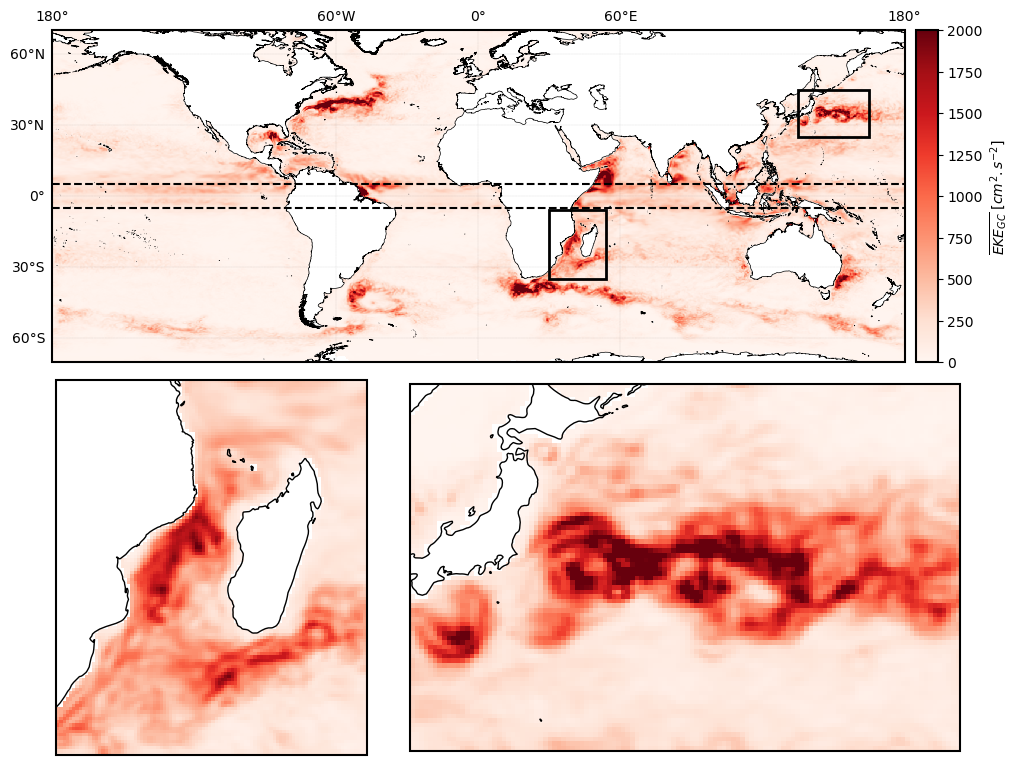

In [10]:
list_zoom_extent=[box_mozemb,box_kuro]
list_zoom_ax = [[0.02, -0.25, 0.5, 0.5],[0.45, -0.25, 0.5, 0.5]]
vmax=2000
plot_map_multizoom(mean_eke_gc,ec_imt.lon,ec_imt.lat,lat_mask=5,vmin=0,vmax=vmax,colorbar_label="$\overline{EKE_{GC}}$ $[cm^{2}.s^{-2}]$ ",list_zoom_ax=list_zoom_ax,list_zoom_extent=list_zoom_extent,cmap=plt.cm.Reds)

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
fsize=12
plt.rcParams.update({'font.size': 12})
import cartopy.feature as cfeature

def plot_map_multizoom(var,lon,lat,title=None,vmax=None,vmin=None,colorbar_label=None,axs=None,fig=None,list_zoom_extent=[[-20, 0, 40, 60]],cmap='RdBu_r',list_zoom_ax = [[0.25, 0.10, 0.5, 0.5]],lat_mask=None,lognorm=None,cbox='k',contour=None,contour_levels=None):

    if not axs:
        fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.Robinson()},
                        figsize=(11*1,7.5*1))
        #p0 = plt.pcolormesh(lon2D, lat2D, norm_uv, cmap='jet',vmax=1)
    #vmax_glob=np.nanmax(var)
    #vmin_glob=np.nanmin(var)
    if lat_mask is not None :
        axs.hlines(lat_mask,-180,180,color='k', alpha=1, linestyle='--')
        axs.hlines(-lat_mask,-180,180,color='k', alpha=1, linestyle='--')

    for spine in axs.spines.values():
        spine.set_zorder(11)  # zorder élevé pour que les bords soient au-dessus des autres éléments


    if lognorm:
        p0 = plt.pcolormesh(lon, lat, var, cmap=cmap,norm=LogNorm(vmin=vmin, vmax=vmax))
    else:  
        p0 = plt.pcolormesh(lon, lat, var, cmap=cmap,vmax=vmax,vmin=vmin,transform=ccrs.PlateCarree())

    if title:
        axs.set_title(title)

    import cartopy
    # projection = cartopy.crs.Mercator()
    axs.add_feature(cartopy.feature.LAND, zorder=3)
    axs.add_feature(cartopy.feature.COASTLINE, zorder=3)
    axs.add_feature(cartopy.feature.LAKES, alpha=0.5, zorder=3)
    axs.add_feature(cartopy.feature.RIVERS, zorder=3)

    #if contour is not None:
    #    plt.contour(lon, lat, contour)
        
    axs.coastlines(resolution='10m', lw=0.5)
    #axs.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#EEEEEE', edgecolor='face',alpha=1)

    # optional add grid lines
    p0.axes.gridlines(color='k', alpha=0.2, linestyle='--', linewidth=1,zorder=10)

    # draw parallels/meridiens and write labels
    gl = p0.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                            linewidth=0.1, color='black', alpha=0.5, linestyle='--')
    # adjust labels to taste
    gl.top_labels = True
    gl.right_labels = False
    gl.bottom_labels = False
    gl.left_labels = True
    #gl.xlabels_bottom = False
    gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
    gl.xlocator = mticker.FixedLocator([-120, -60, 0,  60, 120])
    #gl.xformatter = LONGITUDE_FORMATTER
    #gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}

    #get size and extent of axes:
    axpos = axs.get_position()
    pos_x = axpos.x0+axpos.width + 0.01# + 0.25*axpos.width
    pos_y = axpos.y0
    cax_width = 0.02
    cax_height = axpos.height
    #create new axes where the colorbar should go.
    #it should be next to the original axes and have the same height!
    pos_cax = fig.add_axes([pos_x,pos_y,cax_width,cax_height])
    cbar=plt.colorbar(p0, cax=pos_cax)
    if colorbar_label:
        cbar.set_label(colorbar_label)

    axs.text(0.98, 0.98, "a",
            transform=axs.transAxes,
            fontsize=12, fontweight='bold',
            va='top', ha='right',
            bbox=dict(facecolor='none', alpha=0.7, edgecolor='none'))
    i=0

    for zoom_ax,zoom_extent in zip(list_zoom_ax,list_zoom_extent):

        lon_mg,lat_mg = np.meshgrid(lon,lat)
        var_f = np.where(lat_mg > zoom_extent[2] , var, np.nan)
        var_f = np.where(lat_mg < zoom_extent[3] , var_f, np.nan)
        var_f = np.where(lon_mg < zoom_extent[1] , var_f, np.nan)
        var_f = np.where(lon_mg > zoom_extent[0] , var_f, np.nan)

        if not(vmax):
            vmax=np.nanmax(var_f)
            vmin=np.nanmin(var_f)


        # Ajouter un zoom sur une région spécifique
        ax_zoom = fig.add_axes(zoom_ax, projection=ccrs.PlateCarree())
        ax_zoom.set_extent(zoom_extent, crs=ccrs.PlateCarree())  # Exemple de zoom sur l'Europe

            # projection = cartopy.crs.Mercator()
        ax_zoom.add_feature(cartopy.feature.LAND, zorder=3)
        ax_zoom.add_feature(cartopy.feature.COASTLINE, zorder=3)
        ax_zoom.add_feature(cartopy.feature.LAKES, alpha=0.5, zorder=3)
        ax_zoom.add_feature(cartopy.feature.RIVERS, zorder=3)
        
        for spine in ax_zoom.spines.values():
            spine.set_zorder(11)  # zorder élevé pour que les bords soient au-dessus des autres éléments


        box_kuro_s = [140,157,30,36]
        box_kuro_n = [140,157,36,42]
        # Ajouter les contours de la zone zoomée sur la carte principale
        zoom_rect = plt.Rectangle((box_kuro_s[0], box_kuro_s[2]),
                                box_kuro_s[1] - box_kuro_s[0],
                                box_kuro_s[3] - box_kuro_s[2],
                                linewidth=2, edgecolor="darkblue", facecolor='none',linestyle='--',
                                transform=ccrs.PlateCarree(),zorder=3)
        
        ax_zoom.add_patch(zoom_rect)
        
        if i==1:
            ax_zoom.text(box_kuro_s[1] - 4, box_kuro_s[2] + 3, f"{box_kuro_s_diff_eke:.3g}%",
                        transform=ccrs.PlateCarree(),
                        fontsize=12, color='darkblue',
                        bbox=dict(facecolor='white', alpha=0.7, edgecolor='k'))
            ax_zoom.text(box_kuro_n[1] - 4.5, box_kuro_n[2] + 3, f"+{box_kuro_n_diff_eke:.3g}%",
                transform=ccrs.PlateCarree(),
                fontsize=12, color='darkred',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='k'))      
            
            ax_zoom.text(0.98, 0.98, "c",
            transform=ax_zoom.transAxes,
            fontsize=12, fontweight='bold',
            va='top', ha='right',
            bbox=dict(facecolor='none', alpha=0.7, edgecolor='none'))
        else:
            ax_zoom.text(zoom_extent[0] + 2, zoom_extent[3] - 4, f"+{box_moz_diff_eke:.3g}%",
            transform=ccrs.PlateCarree(),
            fontsize=14, color='darkred',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='k'))

            ax_zoom.text(0.98, 0.98, "b",
            transform=ax_zoom.transAxes,
            fontsize=12, fontweight='bold',
            va='top', ha='right',
            bbox=dict(facecolor='none', alpha=0.7, edgecolor='none'))
        i=+1

        """
        if i==1:
            ax_zoom.text(box_kuro_s[1] - 4, box_kuro_s[2] + 3, "-8.1%",
                        transform=ccrs.PlateCarree(),
                        fontsize=12, color='darkblue',
                        bbox=dict(facecolor='white', alpha=0.7, edgecolor='k'))
            ax_zoom.text(box_kuro_n[1] - 4.5, box_kuro_n[2] + 3, "+16.9%",
                transform=ccrs.PlateCarree(),
                fontsize=12, color='darkred',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='k'))      
            
            ax_zoom.text(0.98, 0.98, "c",
            transform=ax_zoom.transAxes,
            fontsize=12, fontweight='bold',
            va='top', ha='right',
            bbox=dict(facecolor='none', alpha=0.7, edgecolor='none'))
        else:
            ax_zoom.text(zoom_extent[0] + 2, zoom_extent[3] - 4, "+22.3%",
            transform=ccrs.PlateCarree(),
            fontsize=14, color='darkred',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='k'))

            ax_zoom.text(0.98, 0.98, "b",
            transform=ax_zoom.transAxes,
            fontsize=12, fontweight='bold',
            va='top', ha='right',
            bbox=dict(facecolor='none', alpha=0.7, edgecolor='none'))
        i=+1
        """
        zoom_rect = plt.Rectangle((box_kuro_n[0], box_kuro_n[2]),
                        box_kuro_n[1] - box_kuro_n[0],
                        box_kuro_n[3] - box_kuro_n[2],
                        linewidth=2, edgecolor="darkred", facecolor='none',linestyle='--',
                        transform=ccrs.PlateCarree(),zorder=3)
        

        ax_zoom.add_patch(zoom_rect)

        ax_zoom.coastlines(zorder=5)
        # Ajouter les gridlines avec labels pour les zooms
        gl_zoom = ax_zoom.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                                    linewidth=0.5, color='black', alpha=0.5, linestyle='--')
        gl_zoom.top_labels = False
        gl_zoom.right_labels = False
        gl_zoom.bottom_labels = True
        gl_zoom.left_labels = True
        gl_zoom.xlabel_style = {'size': 10, 'color': 'black'}
        gl_zoom.ylabel_style = {'size': 10, 'color': 'black'}
        gl_zoom.ylocator = mticker.MaxNLocator(nbins=3)  # Ajuste le nombre de labels en latitude
        gl_zoom.xlocator = mticker.MaxNLocator(nbins=3)  # Ajuste le nombre de labels en longitude


        if lognorm:
            contour_zoom = ax_zoom.pcolormesh(lon, lat, var, cmap=cmap,transform=ccrs.PlateCarree(),norm=LogNorm(vmin=vmin, vmax=vmax))
        else: 
            contour_zoom = ax_zoom.pcolormesh(lon, lat, var, cmap=cmap,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin)
                                
            if contour is not None:
                contours = ax_zoom.contour(lon, lat, contour,transform=ccrs.PlateCarree(),levels=contour_levels,colors="k")
                plt.clabel(contours, inline=True, fontsize=10, fmt='%1.0f')

        #cax = fig.add_axes([ax_zoom.get_position().x1+0.01,ax_zoom.get_position().y0,0.02,ax_zoom.get_position().height])
        #cax = fig.add_axes([ax_zoom.get_position().x0,ax_zoom.get_position().y0-0.03,ax_zoom.get_position().width,0.02])
        #cbar = plt.colorbar(contour_zoom,cax=cax,orientation="horizontal")


        # Ajouter les contours de la zone zoomée sur la carte principale
        zoom_rect = plt.Rectangle((zoom_extent[0], zoom_extent[2]),
                                zoom_extent[1] - zoom_extent[0],
                                zoom_extent[3] - zoom_extent[2],
                                linewidth=2, edgecolor=cbox, facecolor='none',
                                transform=ccrs.PlateCarree(),zorder=11)
        axs.add_patch(zoom_rect)


In [12]:
box_kuro_s = [140,157,30,36]
box_kuro_n = [140,157,36,40]

eke_gc_kuro_s = eke_gc.sel(lon=slice(140,157)).sel(lat=slice(30,36))
eke_imt_kuro_s = eke_imt.sel(lon=slice(140,157)).sel(lat=slice(30,36))
diff_gc_kuro_s = eke_imt_kuro_s-eke_gc_kuro_s
diff_gc_kuro_s = diff_gc_kuro_s.mean(dim="time").values
box_kuro_s_diff_eke = np.nanmean(diff_gc_kuro_s)*100 / np.nanmean(eke_gc_kuro_s)

eke_gc_kuro_n = eke_gc.sel(lon=slice(140,157)).sel(lat=slice(36,42))
eke_imt_kuro_n = eke_imt.sel(lon=slice(140,157)).sel(lat=slice(36,42))
diff_gc_kuro_n = eke_imt_kuro_n-eke_gc_kuro_n
diff_gc_kuro_n = diff_gc_kuro_n.mean(dim="time").values
box_kuro_n_diff_eke = np.nanmean(diff_gc_kuro_n)*100 / np.nanmean(eke_gc_kuro_n)

eke_gc_moz = eke_gc.sel(lon=slice(box_mozemb[0],box_mozemb[1])).sel(lat=slice(box_mozemb[2],box_mozemb[3]))
eke_imt_moz = eke_imt.sel(lon=slice(box_mozemb[0],box_mozemb[1])).sel(lat=slice(box_mozemb[2],box_mozemb[3]))
diff_gc_moz = eke_imt_moz-eke_gc_moz
diff_gc_moz = diff_gc_moz.mean(dim="time").values
box_moz_diff_eke = np.nanmean(diff_gc_moz)*100 / np.nanmean(eke_gc_moz)

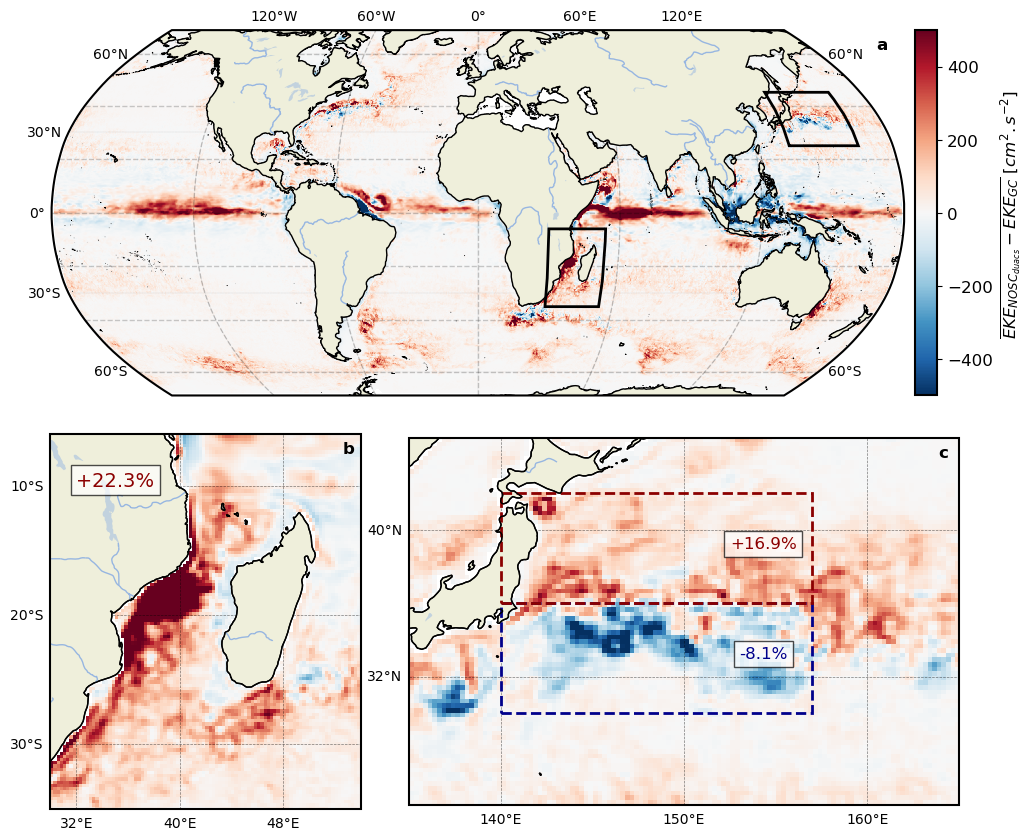

In [13]:
list_zoom_extent=[box_mozemb,box_kuro]
list_zoom_ax = [[0.015, -0.30, 0.5, 0.5],[0.45, -0.30, 0.5, 0.5]]

vmax=500
#levels = [-50,-30,-10,10,30,60]
plot_map_multizoom(diff_gc,ec_imt.lon,ec_imt.lat,lat_mask=None,vmin=-vmax,vmax=vmax,colorbar_label="$\overline{EKE_{NOSC_{duacs}} - EKE_{GC}}$ $[cm^{2}.s^{-2}]$ ",list_zoom_ax=list_zoom_ax,list_zoom_extent=list_zoom_extent)
plt.savefig("../figures/Figure_cyclo_duacs.png",dpi=300,bbox_inches='tight') 

In [ ]:
#diff_gc_norm = (eke_imt-eke_gc)*100 / eke_gc
#diff_gc_norm = diff_gc_norm.mean(dim="time").values
diff_gc_norm = diff_gc*100 / (eke_gc.mean(dim="time").values*10000)
#diff_gc_norm = diff_gc*100 / (eke_imt.mean(dim="time").values*10000)

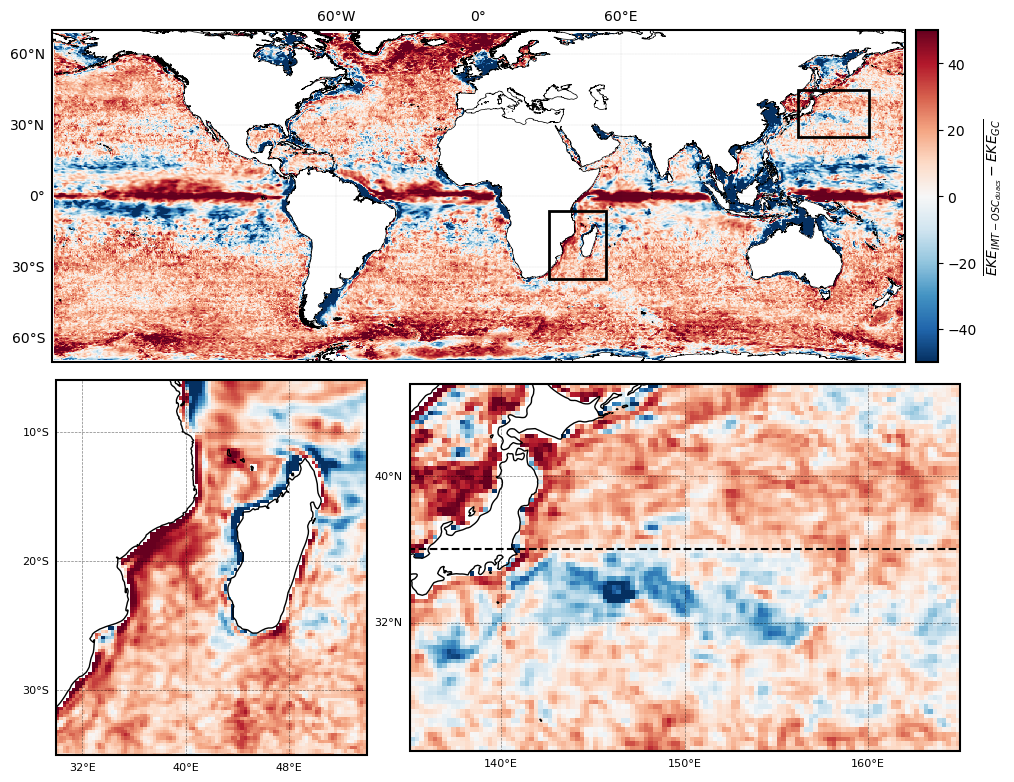

In [119]:
vmax=50
plot_map_multizoom(diff_gc_norm,ec_imt.lon,ec_imt.lat,lat_mask=None,vmin=-vmax,vmax=vmax,colorbar_label="$\overline{EKE_{IMT-OSC_{duacs}} - EKE_{GC}}$",list_zoom_ax=list_zoom_ax,list_zoom_extent=list_zoom_extent)

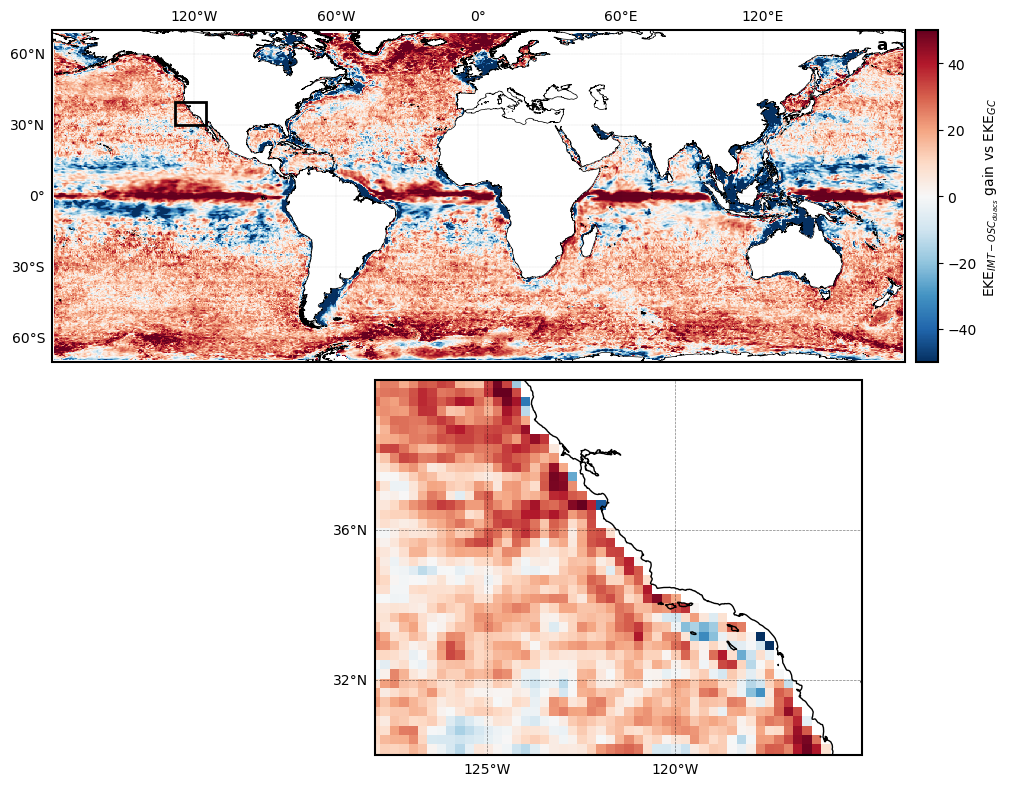

In [21]:
box_cal = [-128, -115, 30, 40]
list_zoom_extent=[box_cal]
list_zoom_ax = [[0.39, -0.25, 0.5, 0.5]]
vmax=50
plot_map_multizoom(diff_gc_norm,ec_imt.lon,ec_imt.lat,lat_mask=None,vmin=-vmax,vmax=vmax,colorbar_label="EKE$_{IMT-OSC_{duacs}}$ gain vs EKE$_{GC}$",list_zoom_ax=list_zoom_ax,list_zoom_extent=list_zoom_extent)


In [26]:
# GC neu
diff_gc_neu = eke_imt_neu-eke_gc
diff_gc_neu = diff_gc_neu.mean(dim="time").values * 10000 #cm2.s-2

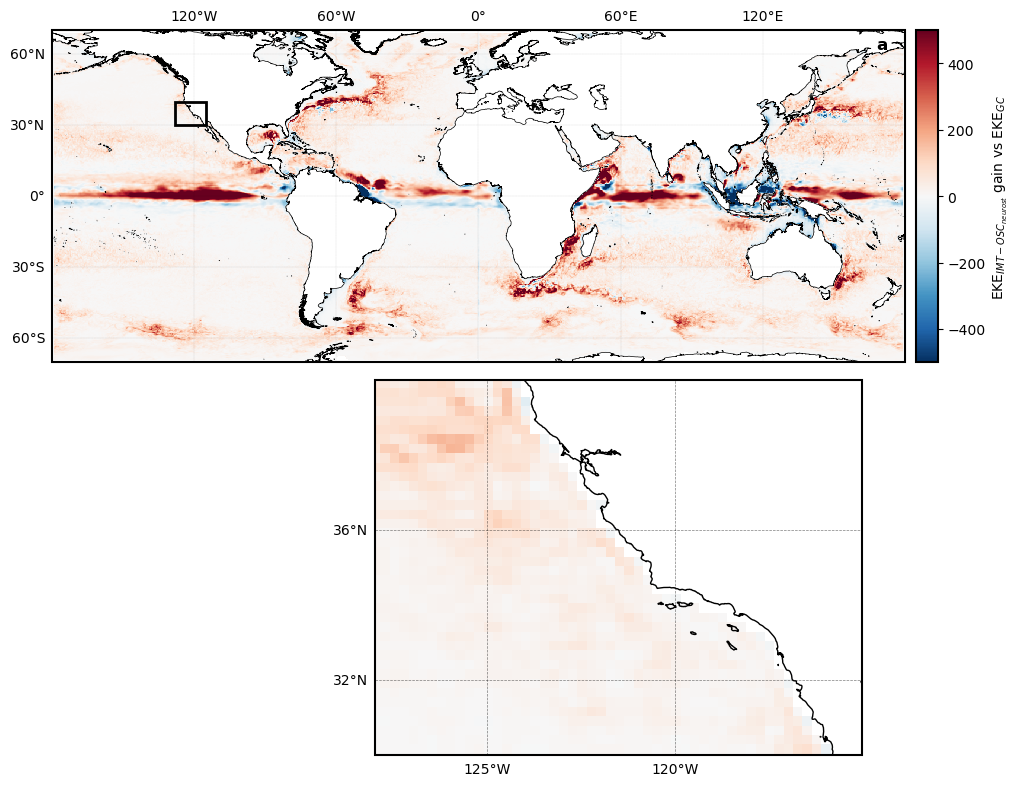

In [29]:
vmax = 500
plot_map_multizoom(diff_gc_neu,ec_imt.lon,ec_imt.lat,lat_mask=None,vmin=-vmax,vmax=vmax,colorbar_label="EKE$_{IMT-OSC_{neurost}}$ gain vs EKE$_{GC}$",list_zoom_ax=list_zoom_ax,list_zoom_extent=list_zoom_extent)

In [30]:
diff_gc_neu_norm = diff_gc_neu*100 / (eke_gc.mean(dim="time").values*10000)

/tmp/ipykernel_1773632/3217103965.py:1: RuntimeWarning: divide by zero encountered in divide
  diff_gc_neu_norm = diff_gc_neu*100 / (eke_gc.mean(dim="time").values*10000)


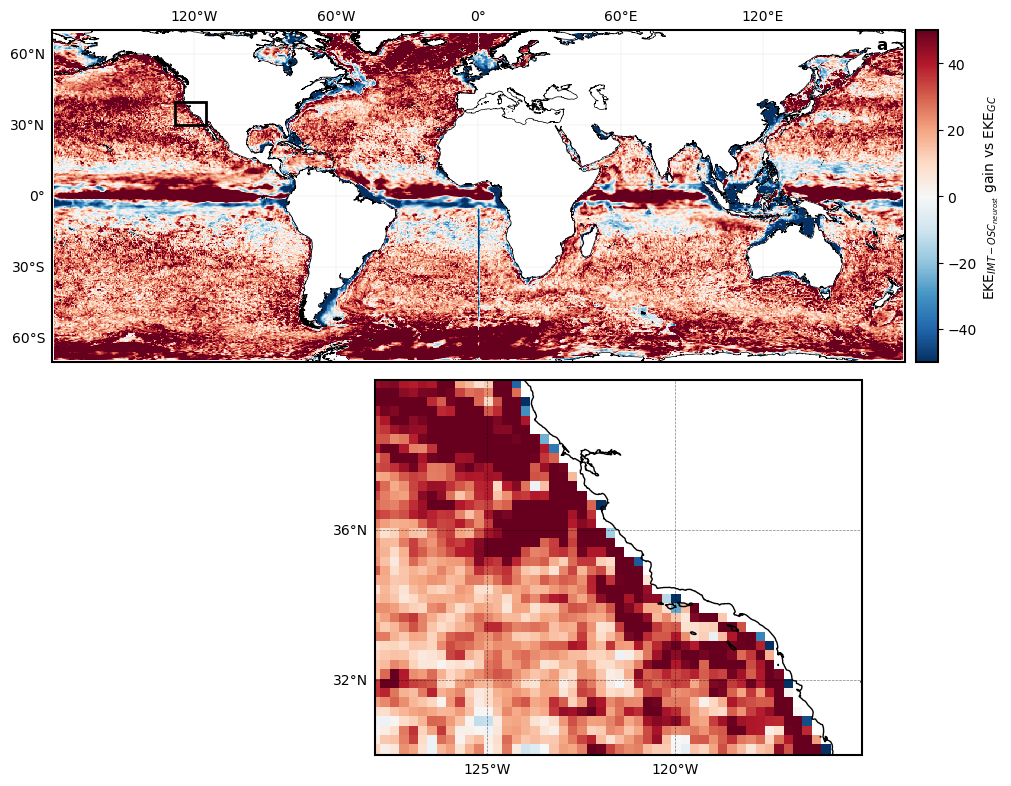

In [32]:
vmax = 50
plot_map_multizoom(diff_gc_neu_norm,ec_imt.lon,ec_imt.lat,lat_mask=None,vmin=-vmax,vmax=vmax,colorbar_label="EKE$_{IMT-OSC_{neurost}}$ gain vs EKE$_{GC}$",list_zoom_ax=list_zoom_ax,list_zoom_extent=list_zoom_extent)

In [73]:
domain=box_kuro
if domain is not False:
    diff_gc_norm_kuro = diff_gc_norm.sel(longitude=slice(domain[0],domain[1])).sel(latitude=slice(domain[2],domain[3]))


AttributeError: 'numpy.ndarray' object has no attribute 'sel'

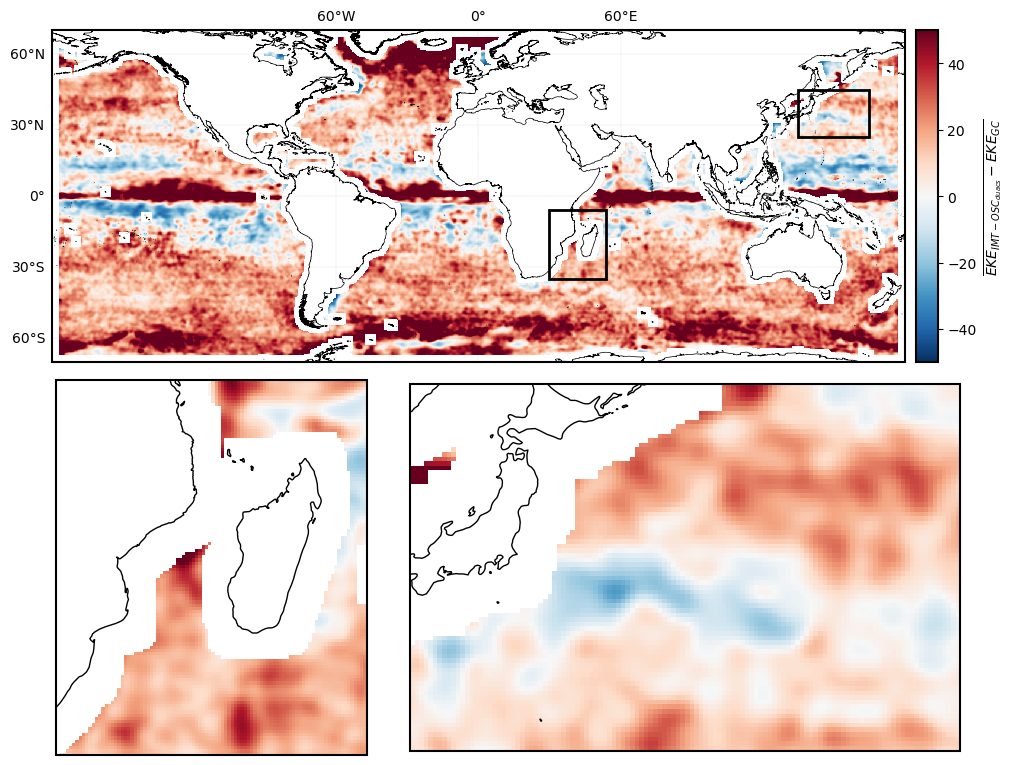

In [69]:
from scipy.ndimage import gaussian_filter
from scipy.ndimage import gaussian_filter, binary_erosion

# Apply Gaussian filter
sigma = 2  # Standard deviation for Gaussian kernel (adjust for more/less smoothing)
pad_width = int(3 * sigma)
diff_gc_norm_gau = gaussian_filter(diff_gc_norm, sigma=sigma)
vmax=50
plot_map_multizoom(diff_gc_norm_gau,ec_imt.lon,ec_imt.lat,lat_mask=None,vmin=-vmax,vmax=vmax,colorbar_label="$\overline{EKE_{IMT-OSC_{duacs}} - EKE_{GC}}$",list_zoom_ax=list_zoom_ax,list_zoom_extent=list_zoom_extent)

In [67]:
from scipy.signal import convolve2d
from scipy.stats import norm

# Crée un noyau gaussien 2D
x = np.linspace(-3*sigma, 3*sigma, int(6*sigma+1))
y = x
X, Y = np.meshgrid(x, y)
kernel = np.exp(-(X**2 + Y**2)/(2*sigma**2))
kernel /= kernel.sum()  # Normalisation

# Applique la convolution avec mode='same' pour conserver la taille
Z_smoothed = convolve2d(diff_gc_norm, kernel, mode='same', boundary='symm')

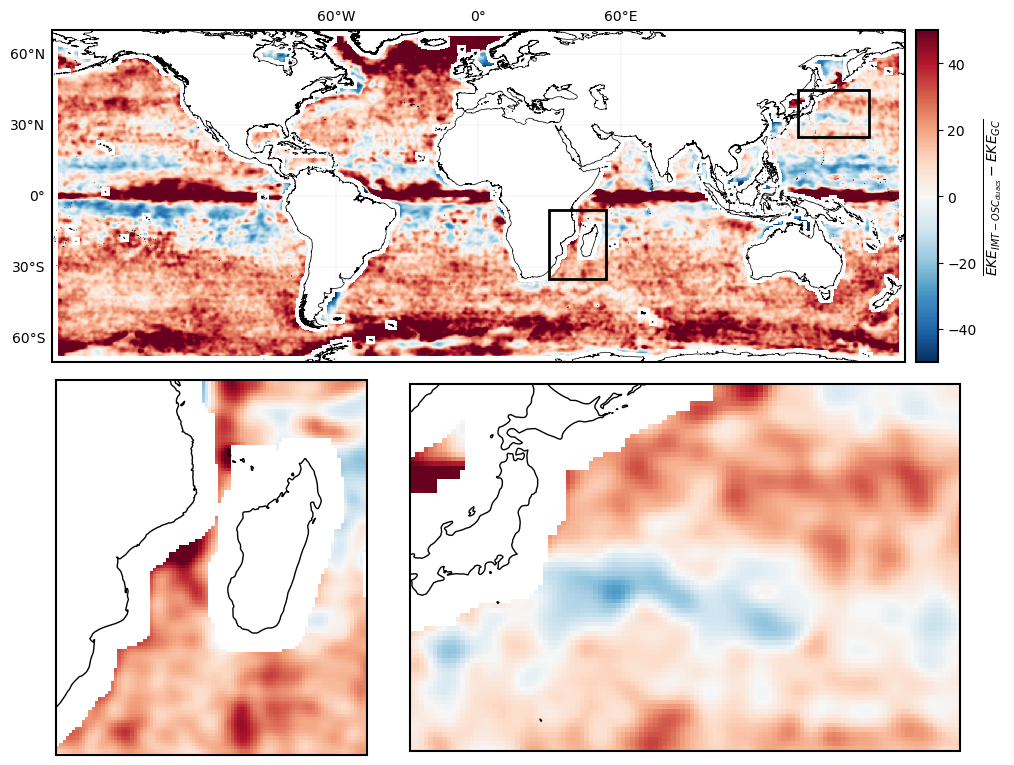

In [68]:
plot_map_multizoom(Z_smoothed,ec_imt.lon,ec_imt.lat,lat_mask=None,vmin=-vmax,vmax=vmax,colorbar_label="$\overline{EKE_{IMT-OSC_{duacs}} - EKE_{GC}}$",list_zoom_ax=list_zoom_ax,list_zoom_extent=list_zoom_extent)

In [ ]:
ec_imt_mean = ec_imt.mean(dim="time").values

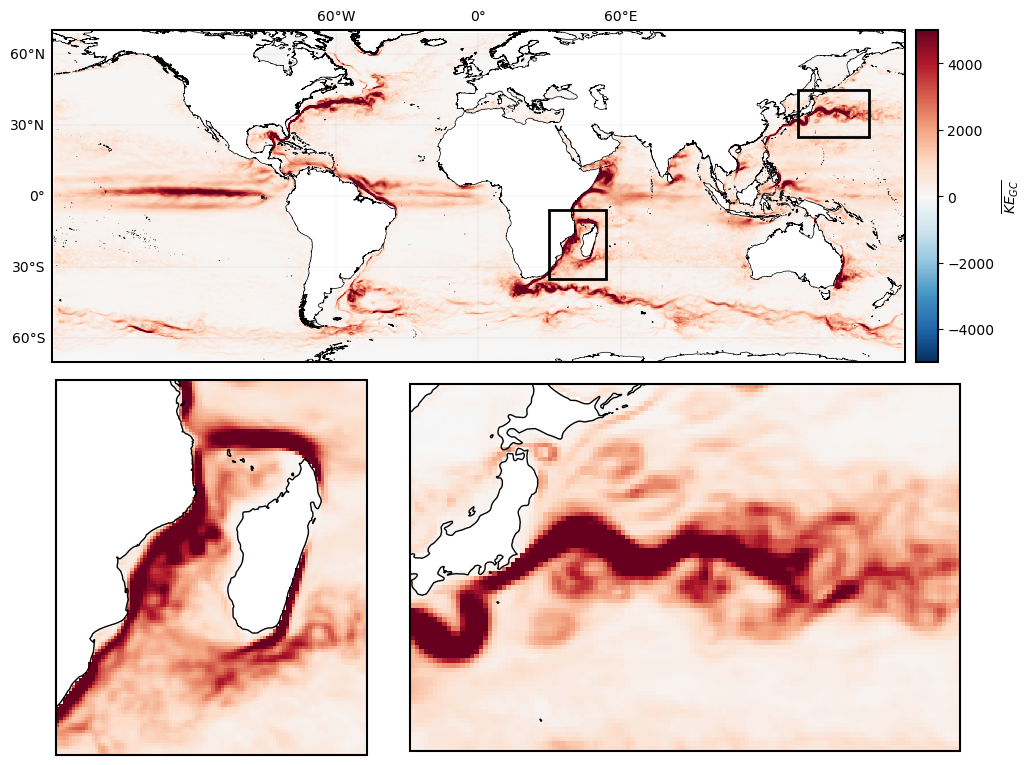

In [24]:

vmax=5000
plot_map_multizoom(ec_imt_mean*10000,ec_imt.lon,ec_imt.lat,lat_mask=None,vmin=-vmax,vmax=vmax,colorbar_label="$\overline{KE_{GC}}$",list_zoom_ax=list_zoom_ax,list_zoom_extent=list_zoom_extent)
plt.contour(ec_imt_mean*10000)

In [61]:
# Compute VRT of the product
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd 
import sys 
sys.path.append("/Odyssey/private/t22picar/tools/")
sys.path.append("/Odyssey/private/t22picar/plot_article/JPDF")
from plot_tools import plot_uv_map,plot_map_zoom,plot_map_multizoom
from R_tools_theo import * 

from datetime import datetime, timedelta

def compute_strain_vrt(xp_name,domain=False,interp=False,time_target=None):

    if time_target is None:
        time_target='2019-01-01'

    if xp_name=="duacs_15m_8th":
        result_filepath =  f"/Odyssey/private/t22picar/multivar_drifter/rec/{xp_name}/daily/duacs_15m_8th_{time_target}.nc"
    else:
        result_filepath =  f"/Odyssey/private/t22picar/multivar_drifter/rec/{xp_name}/daily/unet_rec_{time_target}.nc"

    duacs = xr.open_dataset(result_filepath)


    if "lat" in duacs.coords:
        duacs = duacs.rename({"lat": "latitude"})
    if "lon" in duacs.coords:
        duacs = duacs.rename({"lon": "longitude"})

    if interp:
        result_filepath =  f"/Odyssey/private/t22picar/multivar_drifter/rec/duacs_15m_8th/daily/duacs_15m_8th_{time_target}.nc"
        duacs_8th=xr.open_dataset(result_filepath)
        duacs = duacs.interp(longitude=duacs_8th.longitude,latitude=duacs_8th.latitude,method="linear")
    #duacs
    duacs = duacs.sel(latitude=slice(-70,70))

    if domain is not False:
        duacs = duacs.sel(longitude=slice(domain[0],domain[1])).sel(latitude=slice(domain[2],domain[3]))

    # Masquer les valeurs entre -10 et 10 de latitude
    duacs = duacs.where(
        (duacs.latitude < -10) | (duacs.latitude > 10),
        np.nan  # Remplace par NaN si la condition n'est pas remplie
    )

    u=duacs.ugos.values.T
    v=duacs.vgos.values.T

    #lon, lat = np.meshgrid(duacs.lon.values, duacs.lat.values)
    lon, lat = np.meshgrid(duacs.longitude.values, duacs.latitude.values)

    dx = sphere_distance(lat[:, :-1], lat[:, 1:], lon[:, :-1], lon[:, 1:]).T
    dy = sphere_distance(lat[:-1, :], lat[1:, :], lon[:-1, :], lon[1:, :]).T

    pm = u2rho(1 / dx)
    pn = v2rho(1 / dy)
    f = compute_coriolis_factor(lat).T
    # Compute Vorticity
    vrt =  psi2rho(get_vrt(rho2u(u),rho2v(v),pm,pn)) / f #np.abs(f)

    return vrt, lon, lat

In [62]:
xp_name = "duacs_15m_8th"
domain = box_kuro
time_target="2019-02-01"


# Définir la date de début et de fin
start_date = datetime(2019, 1, 1)
end_date = datetime(2019, 12, 31)

# Boucler sur chaque jour de 2019
current_date = start_date 

vrt_list = []

while current_date <= end_date:
    time_target = current_date.strftime("%Y-%m-%d")
    vrt, lon, lat = compute_strain_vrt(xp_name, domain=domain, time_target=time_target)
    # Fais ce que tu veux avec vrt, lon, lat ici
    vrt_list.append(vrt)
    current_date += timedelta(days=1)

In [63]:
vrt_list_kuro = np.array(vrt_list)
vrt_mean_kuro = np.nanmean(vrt_list_kuro,axis=0)

/tmp/ipykernel_1044307/864406645.py:2: RuntimeWarning: Mean of empty slice
  vrt_mean_kuro = np.nanmean(vrt_list_kuro,axis=0)


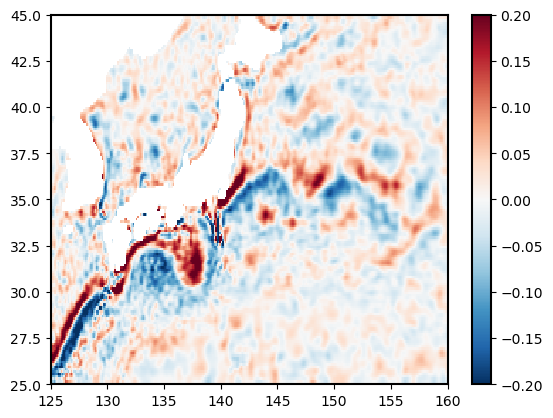

In [64]:

plt.pcolormesh(lon,lat,vrt_mean_kuro.T,cmap=plt.cm.RdBu_r,vmin=-0.2,vmax=0.2)
plt.colorbar()

In [65]:
xp_name = "duacs_15m_8th"
domain = box_mozemb
time_target="2019-02-01"


# Définir la date de début et de fin
start_date = datetime(2019, 1, 1)
end_date = datetime(2019, 12, 31)

# Boucler sur chaque jour de 2019
current_date = start_date 

vrt_list = []

while current_date <= end_date:
    time_target = current_date.strftime("%Y-%m-%d")
    vrt, lon, lat = compute_strain_vrt(xp_name, domain=domain, time_target=time_target)
    # Fais ce que tu veux avec vrt, lon, lat ici
    vrt_list.append(vrt)
    current_date += timedelta(days=1)

In [66]:
vrt_list_moz = np.array(vrt_list)
vrt_mean_moz = np.nanmean(vrt_list_moz,axis=0)

/tmp/ipykernel_1044307/1354506669.py:2: RuntimeWarning: Mean of empty slice
  vrt_mean_moz = np.nanmean(vrt_list_moz,axis=0)


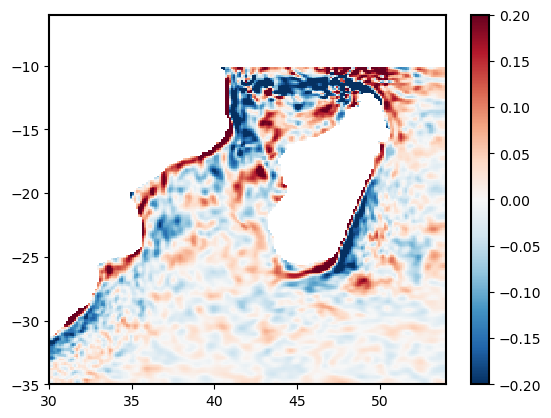

In [67]:
plt.pcolormesh(lon,lat,vrt_mean_moz.T,cmap=plt.cm.RdBu_r,vmin=-0.2,vmax=0.2)
plt.colorbar()

In [21]:
np.nanmean(eke_imt-eke_gc)

0.00238964

In [22]:
np.nanmean(np.abs(eke_gc))

0.017833656

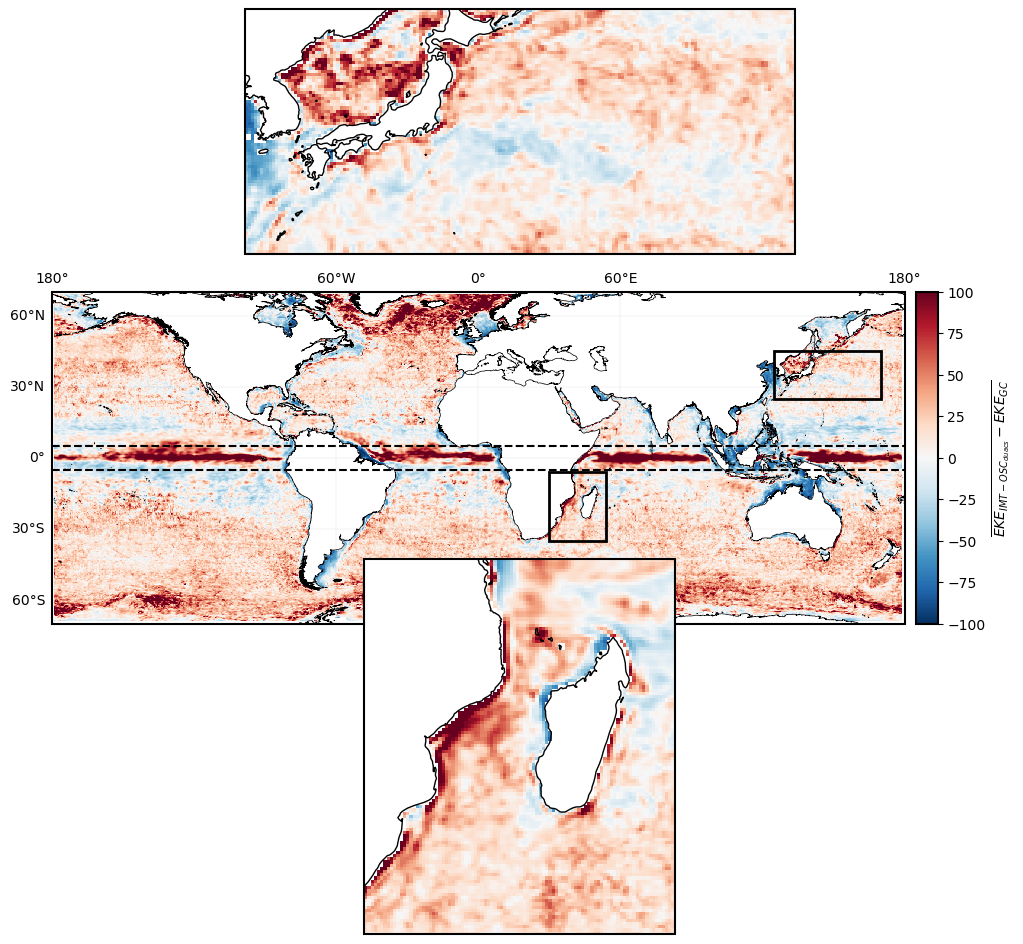

In [11]:
eke_gc_moz = eke_gc.sel(lon=slice(box_mozemb[0],box_mozemb[1])).sel(lat=slice(box_mozemb[2],box_mozemb[3]))
eke_imt_moz = eke_imt.sel(lon=slice(box_mozemb[0],box_mozemb[1])).sel(lat=slice(box_mozemb[2],box_mozemb[3]))
diff_gc_moz = eke_imt_moz-eke_gc_moz
diff_gc_moz = diff_gc_moz.mean(dim="time").values

np.nanmean(diff_gc_moz)*100 / np.nanmean(eke_gc_moz)

22.260114797453898

DUACS

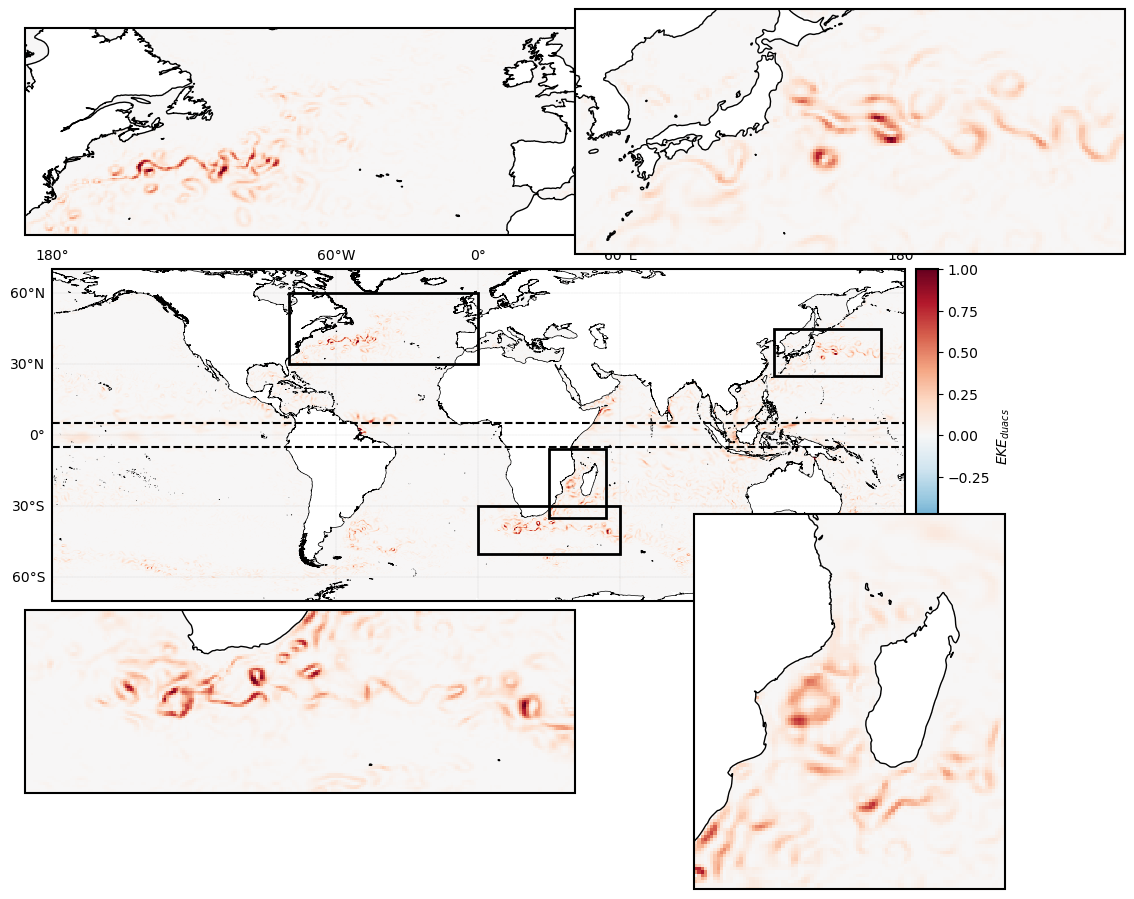

In [ ]:
vmax=1
plot_map_multizoom(eke_duacs[0,:],ec_imt.lon,ec_imt.lat,lat_mask=5,vmin=-vmax,vmax=vmax,colorbar_label="$EKE_{duacs}$",list_zoom_ax=list_zoom_ax,list_zoom_extent=list_zoom_extent)

In [14]:
# Duacs

diff_duacs = eke_imt-eke_duacs
diff_duacs = diff_duacs.mean(dim="time").values

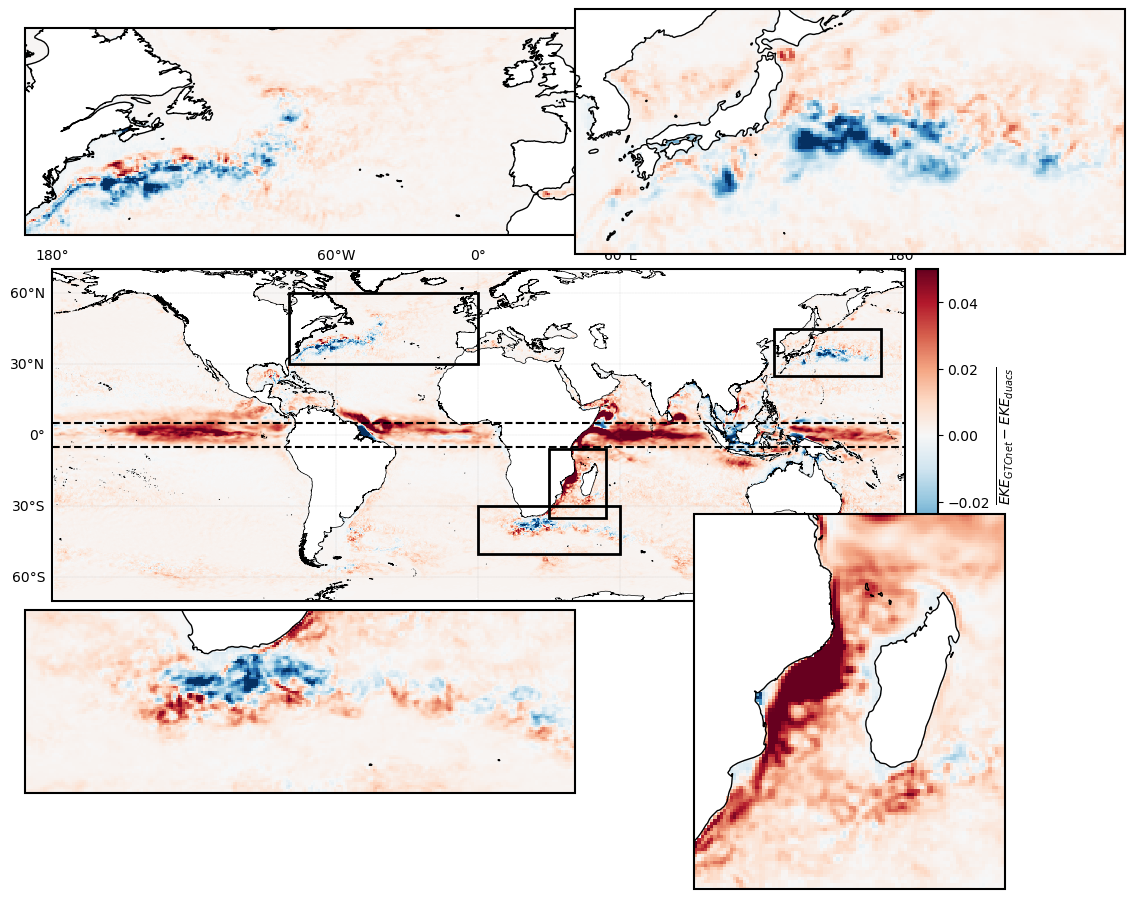

In [23]:
vmax=0.05
plot_map_multizoom(diff_duacs,ec_imt.lon,ec_imt.lat,lat_mask=5,vmin=-vmax,vmax=vmax,colorbar_label="$\overline{EKE_{GTCnet} - EKE_{duacs}}$",list_zoom_ax=list_zoom_ax,list_zoom_extent=list_zoom_extent)

In [ ]:
diff_gc.sel(diff_gc)